In [1]:
# import packages
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# load data
data = load_breast_cancer()

In [3]:
# prep data
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.3)
_, D = X_train.shape

# standarize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# define logistic regression model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# create model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit model with training data
r = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=200)

# predict y using training and testing data sets to
print('Train score: ', model.evaluate(X_train, y_train))
print('Test score: ', model.evaluate(X_test, y_test))

l_accuracy: 0.9766
Epoch 63/200
13/13 [==============================] - 0s 3ms/step - loss: 0.1287 - accuracy: 0.9724 - val_loss: 0.1171 - val_accuracy: 0.9766
Epoch 64/200
13/13 [==============================] - 0s 3ms/step - loss: 0.1276 - accuracy: 0.9724 - val_loss: 0.1162 - val_accuracy: 0.9766
Epoch 65/200
13/13 [==============================] - 0s 3ms/step - loss: 0.1266 - accuracy: 0.9724 - val_loss: 0.1153 - val_accuracy: 0.9766
Epoch 66/200
13/13 [==============================] - 0s 3ms/step - loss: 0.1256 - accuracy: 0.9724 - val_loss: 0.1145 - val_accuracy: 0.9766
Epoch 67/200
13/13 [==============================] - 0s 3ms/step - loss: 0.1246 - accuracy: 0.9724 - val_loss: 0.1136 - val_accuracy: 0.9766
Epoch 68/200
13/13 [==============================] - 0s 4ms/step - loss: 0.1236 - accuracy: 0.9724 - val_loss: 0.1127 - val_accuracy: 0.9766
Epoch 69/200
13/13 [==============================] - 0s 3ms/step - loss: 0.1228 - accuracy: 0.9724 - val_loss: 0.1118 - val_accu

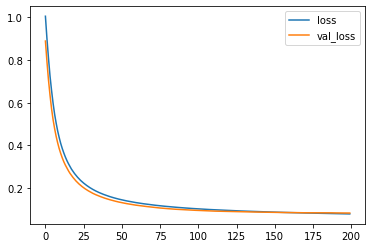

In [5]:
# plot training and testing loss across every iteration of model training
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

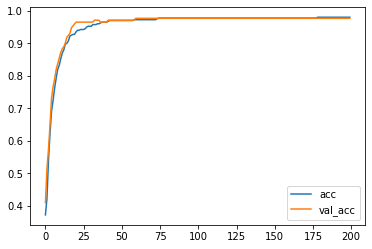

In [6]:
# plot accuracy score across every iteration of model training for both training and testing data sets
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();